In [1]:
# import packages and data set that will be used for the logistics regression analysis
import seaborn as sb
sb.set(style="white")
sb.set(style="whitegrid", color_codes=True)
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.core.display import HTML
from IPython.display import display
import pandas as pd
from pandas import Series, DataFrame
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
pd.set_option('display.max_columns', None)
df = pd.read_csv (r'C:\Users\fahim\Documents\0_WGUDocuments\d208\1medical_clean.csv')

In [2]:
# check if there is any missing data entries. Output should be false.
df.isna().any()

CaseOrder             False
Customer_id           False
Interaction           False
UID                   False
City                  False
State                 False
County                False
Zip                   False
Lat                   False
Lng                   False
Population            False
Area                  False
TimeZone              False
Job                   False
Children              False
Age                   False
Income                False
Marital               False
Gender                False
ReAdmis               False
VitD_levels           False
Doc_visits            False
Full_meals_eaten      False
vitD_supp             False
Soft_drink            False
Initial_admin         False
HighBlood             False
Stroke                False
Complication_risk     False
Overweight            False
Arthritis             False
Diabetes              False
Hyperlipidemia        False
BackPain              False
Anxiety               False
Allergic_rhinitis   

In [3]:
# check if there are any duplicate data in columns
df[df.duplicated()]

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8


In [4]:
# Check if any of the columns are duplicated. Output should be False.
df.columns.duplicated().any()

False

In [5]:
# Check if any of the rows are duplicated. Output should be False.
df.duplicated().any()

False

In [6]:
# remove demographic data from the data set since these entries won't be necessary for the logistic regression analysis
df = df.drop(['CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip','Lat','Lng','Population','Area','TimeZone','Job'], axis=1)

In [7]:
# check to make sure that the columns for demographic data were dropped before proceeding
df.head()

,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [8]:
# drop the remaining the columns we don't need for this analysis
df.drop(['Item8','Item7','Item6','Item5','Item4','Item3','Item2','Item1'],axis = 1,inplace=True)
# verify that all the columns were dropped before proceeding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Children            10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   Marital             10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   ReAdmis             10000 non-null  object 
 6   VitD_levels         10000 non-null  float64
 7   Doc_visits          10000 non-null  int64  
 8   Full_meals_eaten    10000 non-null  int64  
 9   vitD_supp           10000 non-null  int64  
 10  Soft_drink          10000 non-null  object 
 11  Initial_admin       10000 non-null  object 
 12  HighBlood           10000 non-null  object 
 13  Stroke              10000 non-null  object 
 14  Complication_risk   10000 non-null  object 
 15  Overweight          10000 non-null  object 
 16  Arthr

In [9]:
# convert categorical yes/no values to numeric 1/0 values
df = df.replace(to_replace = ['Yes','No'],value = [1,0])
df

,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,1,53,86575.93,Divorced,Male,0,19.141466,6,0,0,0,Emergency Admission,1,0,Medium,0,1,1,0,1,1,1,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,3,51,46805.99,Married,Female,0,18.940352,4,2,1,0,Emergency Admission,1,0,High,1,0,0,0,0,0,0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,3,53,14370.14,Widowed,Female,0,18.057507,4,1,0,0,Elective Admission,1,0,Medium,1,0,1,0,0,0,0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,0,78,39741.49,Married,Male,0,16.576858,4,1,0,0,Elective Admission,0,1,Medium,0,1,0,0,0,0,0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,1,22,1209.56,Widowed,Female,0,17.439069,5,0,2,1,Elective Admission,0,0,Low,0,0,0,1,0,0,1,0,0,CT Scan,1.254807,2113.073274,3716.525786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,25,45967.61,Widowed,Male,0,16.980860,4,2,1,0,Emergency Admission,1,0,Medium,0,0,0,0,0,1,0,1,0,Intravenous,51.561220,6850.942000,8927.642000
9996,4,87,14983.02,Widowed,Male,1,18.177020,5,0,0,0,Elective Admission,1,0,Medium,1,1,1,0,0,0,0,0,1,CT Scan,68.668240,7741.690000,28507.150000
9997,3,45,65917.81,Separated,Female,1,17.129070,4,2,0,1,Elective Admission,1,0,High,1,0,0,0,0,1,1,0,0,Intravenous,70.154180,8276.481000,15281.210000
9998,3,43,29702.32,Divorced,Male,1,19.910430,5,2,1,0,Emergency Admission,0,0,Medium,1,0,0,0,1,0,0,0,0,Blood Work,63.356900,7644.483000,7781.678000


In [10]:
# describe the dataframe to identify distribution of variables for summary statistics
df.describe()

,Children,Age,Income,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,TotalCharge,Additional_charges
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,2.097200,53.511700,40490.495160,0.366900,17.964262,5.012200,1.001400,0.398900,0.257500,0.409000,0.199300,0.709400,0.357400,0.27380,0.337200,0.411400,0.321500,0.394100,0.413500,0.28930,34.455299,5312.172769,12934.528587
std,2.163659,20.638538,28521.153293,0.481983,2.017231,1.045734,1.008117,0.628505,0.437279,0.491674,0.399494,0.454062,0.479258,0.44593,0.472777,0.492112,0.467076,0.488681,0.492486,0.45346,26.309341,2180.393838,6542.601544
min,0.000000,18.000000,154.080000,0.000000,9.806483,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.001981,1938.312067,3125.703000
25%,0.000000,36.000000,19598.775000,0.000000,16.626439,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,7.896215,3179.374015,7986.487755
50%,1.000000,53.000000,33768.420000,0.000000,17.951122,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,35.836244,5213.952000,11573.977735
75%,3.000000,71.000000,54296.402500,1.000000,19.347963,6.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,61.161020,7459.699750,15626.490000
max,10.000000,89.000000,207249.100000,1.000000,26.394449,9.000000,7.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,71.981490,9180.728000,30566.070000


In [11]:
#Create dummies for Gender and the target variable 
df['gender_dummy'] = [1 if v == 'Female' else 0 for v in df['Gender']]
df['ReAdmis_dummy'] = [1 if v == 'Yes' else 0 for v in df['ReAdmis']]

In [12]:
print(df)

      Children  Age    Income    Marital  Gender  ReAdmis  VitD_levels  \
0            1   53  86575.93   Divorced    Male        0    19.141466   
1            3   51  46805.99    Married  Female        0    18.940352   
2            3   53  14370.14    Widowed  Female        0    18.057507   
3            0   78  39741.49    Married    Male        0    16.576858   
4            1   22   1209.56    Widowed  Female        0    17.439069   
...        ...  ...       ...        ...     ...      ...          ...   
9995         2   25  45967.61    Widowed    Male        0    16.980860   
9996         4   87  14983.02    Widowed    Male        1    18.177020   
9997         3   45  65917.81  Separated  Female        1    17.129070   
9998         3   43  29702.32   Divorced    Male        1    19.910430   
9999         8   70  62682.63  Separated  Female        1    18.388620   

      Doc_visits  Full_meals_eaten  vitD_supp  Soft_drink  \
0              6                 0          0     

In [13]:
# convert the categorical variable of genders to a numeric variable
df['Gender'] = df['Gender'].replace(['Male','Female','Nonbinary'],[1,2,3])
df

,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,gender_dummy,ReAdmis_dummy
0,1,53,86575.93,Divorced,1,0,19.141466,6,0,0,0,Emergency Admission,1,0,Medium,0,1,1,0,1,1,1,0,1,Blood Work,10.585770,3726.702860,17939.403420,0,0
1,3,51,46805.99,Married,2,0,18.940352,4,2,1,0,Emergency Admission,1,0,High,1,0,0,0,0,0,0,1,0,Intravenous,15.129562,4193.190458,17612.998120,1,0
2,3,53,14370.14,Widowed,2,0,18.057507,4,1,0,0,Elective Admission,1,0,Medium,1,0,1,0,0,0,0,0,0,Blood Work,4.772177,2434.234222,17505.192460,1,0
3,0,78,39741.49,Married,1,0,16.576858,4,1,0,0,Elective Admission,0,1,Medium,0,1,0,0,0,0,0,1,1,Blood Work,1.714879,2127.830423,12993.437350,0,0
4,1,22,1209.56,Widowed,2,0,17.439069,5,0,2,1,Elective Admission,0,0,Low,0,0,0,1,0,0,1,0,0,CT Scan,1.254807,2113.073274,3716.525786,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,25,45967.61,Widowed,1,0,16.980860,4,2,1,0,Emergency Admission,1,0,Medium,0,0,0,0,0,1,0,1,0,Intravenous,51.561220,6850.942000,8927.642000,0,0
9996,4,87,14983.02,Widowed,1,1,18.177020,5,0,0,0,Elective Admission,1,0,Medium,1,1,1,0,0,0,0,0,1,CT Scan,68.668240,7741.690000,28507.150000,0,0
9997,3,45,65917.81,Separated,2,1,17.129070,4,2,0,1,Elective Admission,1,0,High,1,0,0,0,0,1,1,0,0,Intravenous,70.154180,8276.481000,15281.210000,1,0
9998,3,43,29702.32,Divorced,1,1,19.910430,5,2,1,0,Emergency Admission,0,0,Medium,1,0,0,0,1,0,0,0,0,Blood Work,63.356900,7644.483000,7781.678000,0,0


In [14]:
# convert the non-married Marital status values to "Married/Not Married", then convert "Married/Not Married" to "1/0"
#this will make the Marital variable easier to work with during regression analysis
df['Marital'] = df['Marital'].replace(['Divorced','Widowed','Separated','Never Married'],'Not Married')
df['Marital'] = df['Marital'].replace(['Married','Not Married'],[1,0])

In [15]:
# convert the Initial_Admin, Complication_risk, and Services variables into integers before proceeding
df['Initial_admin'] = df['Initial_admin'].replace(['Elective Admission','Observation Admission','Emergency Admission'],[1,2,3])
df['Complication_risk'] = df['Complication_risk'].replace(['Low','Medium','High'],[1,2,3])
df['Services'] = df['Services'].replace(['Blood Work','CT Scan','Intravenous','MRI'],[1,2,3,4])
df.info()
df.describe()
my_list = df.columns.values.tolist()
print(my_list)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Children            10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   Marital             10000 non-null  int64  
 4   Gender              10000 non-null  int64  
 5   ReAdmis             10000 non-null  int64  
 6   VitD_levels         10000 non-null  float64
 7   Doc_visits          10000 non-null  int64  
 8   Full_meals_eaten    10000 non-null  int64  
 9   vitD_supp           10000 non-null  int64  
 10  Soft_drink          10000 non-null  int64  
 11  Initial_admin       10000 non-null  int64  
 12  HighBlood           10000 non-null  int64  
 13  Stroke              10000 non-null  int64  
 14  Complication_risk   10000 non-null  int64  
 15  Overweight          10000 non-null  int64  
 16  Arthr

In [16]:
# describe the dataframe to identify distribution of variables
df.describe()

,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,gender_dummy,ReAdmis_dummy
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0
mean,2.097200,53.511700,40490.495160,0.202300,1.544600,0.366900,17.964262,5.012200,1.001400,0.398900,0.257500,2.255600,0.409000,0.199300,2.123300,0.709400,0.357400,0.27380,0.337200,0.411400,0.321500,0.394100,0.413500,0.28930,1.862500,34.455299,5312.172769,12934.528587,0.501800,0.0
std,2.163659,20.638538,28521.153293,0.401735,0.539296,0.481983,2.017231,1.045734,1.008117,0.628505,0.437279,0.831347,0.491674,0.399494,0.730172,0.454062,0.479258,0.44593,0.472777,0.492112,0.467076,0.488681,0.492486,0.45346,0.986251,26.309341,2180.393838,6542.601544,0.500022,0.0
min,0.000000,18.000000,154.080000,0.000000,1.000000,0.000000,9.806483,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.001981,1938.312067,3125.703000,0.000000,0.0
25%,0.000000,36.000000,19598.775000,0.000000,1.000000,0.000000,16.626439,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,7.896215,3179.374015,7986.487755,0.000000,0.0
50%,1.000000,53.000000,33768.420000,0.000000,2.000000,0.000000,17.951122,5.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,35.836244,5213.952000,11573.977735,1.000000,0.0
75%,3.000000,71.000000,54296.402500,0.000000,2.000000,1.000000,19.347963,6.000000,2.000000,1.000000,1.000000,3.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,61.161020,7459.699750,15626.490000,1.000000,0.0
max,10.000000,89.000000,207249.100000,1.000000,3.000000,1.000000,26.394449,9.000000,7.000000,5.000000,1.000000,3.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,4.000000,71.981490,9180.728000,30566.070000,1.000000,0.0


In [17]:
# identify the columns for numerical data
NumericalData = df.select_dtypes(include = "number").columns
print (NumericalData)

Index(['Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'gender_dummy', 'ReAdmis_dummy'],
      dtype='object')


	0       :  6331

1. ReAdmis is numerical.
	1       :  3669

2. ReAdmis is numerical.
0    6331
1    3669
Name: ReAdmis, dtype: int64


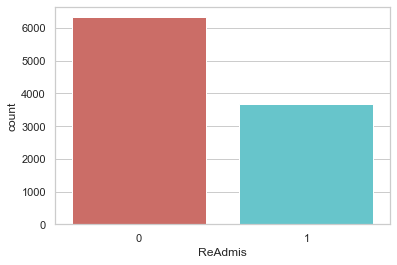

In [19]:
# Callout the target variable "ReAdmis" and describe it's characteristics
target = 'ReAdmis'
for idx, c in enumerate(df.loc[:, df.columns == target]):
     if df.dtypes[c] == "object":
             print('\n{}. {} is categorical: {}.'.format(idx+1,c,df[c].unique()))
for idx,name in enumerate(df[c].value_counts().index.tolist()):
    print('\t{:<8}:{:>6}'.format(name,df[c].value_counts()[idx]))
    print('\n{}. {} is numerical.'.format(idx+1, c))

# data cleaning is complete and parameters have been set, and we can now proceed to the analysis
# begin visuallizing the data and include the univariate and bivariate analyses
print(df[target].value_counts())
sb.countplot(x=target, data=df, palette='hls')
plt.show()

In [22]:
# print the columns for categorical data
CategoricalData = df.select_dtypes(include = "object").columns
print(CategoricalData)

Index([], dtype='object')


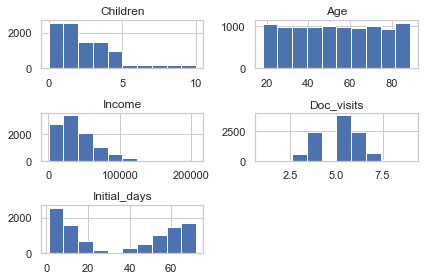

In [24]:
# showcase the univariate distributions
df[['Children','Age','Income','Doc_visits','Initial_days']].hist()
plt.tight_layout()

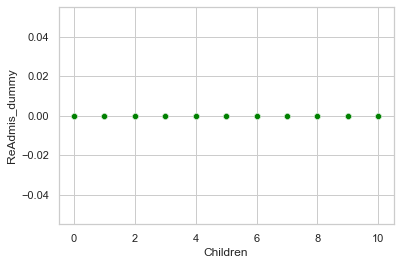

In [25]:
# showcase the bivariate distributions through scatterplots
sb.scatterplot(x=df['Children'], y=df['ReAdmis_dummy'], color='green')
plt.show();

<AxesSubplot:xlabel='Asthma'>

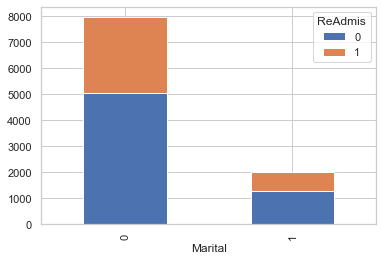

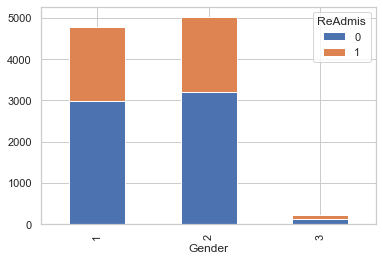

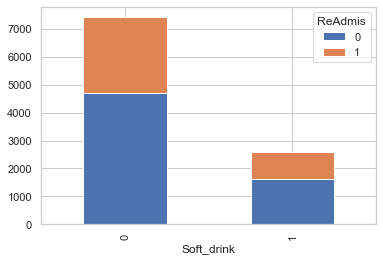

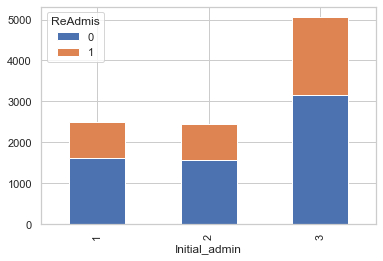

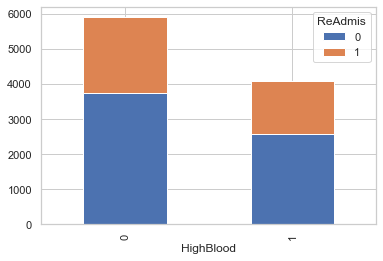

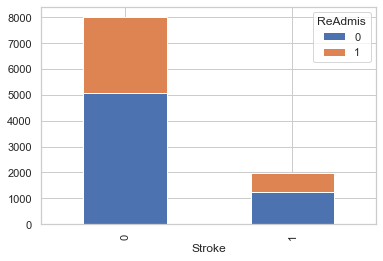

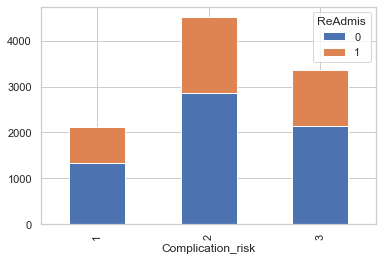

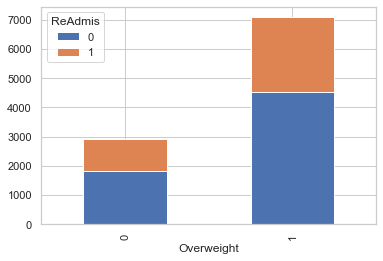

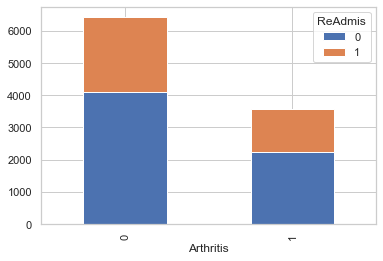

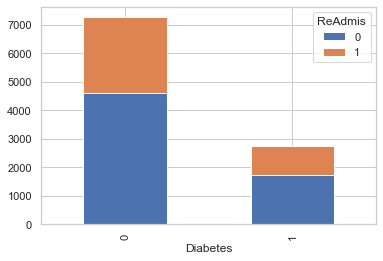

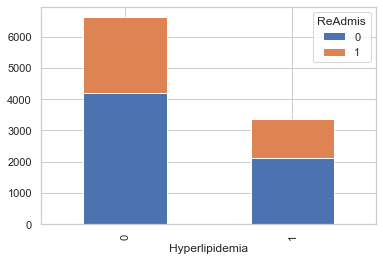

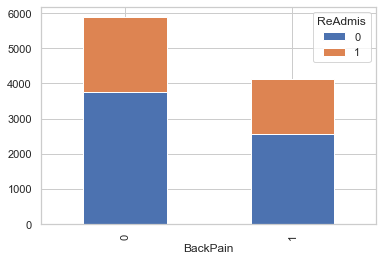

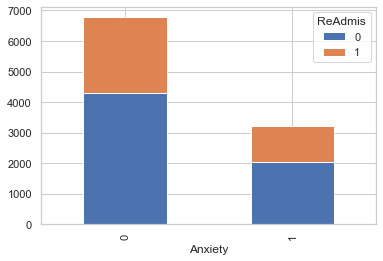

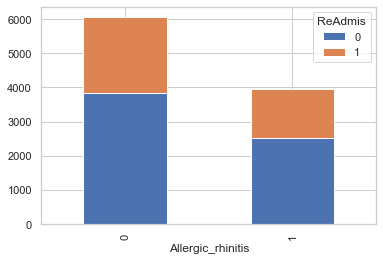

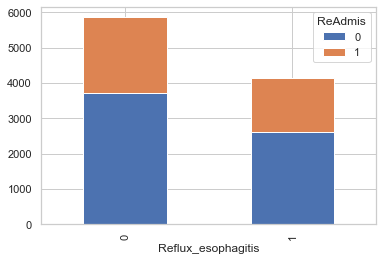

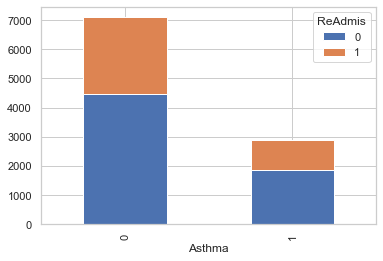

In [26]:
# Compare the target variable "ReAdmis" to ALL of the categorical variables
tbl = pd.pivot_table(df.groupby(['Marital','ReAdmis']).size().reset_index(),
values=0,
index='Marital',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Gender','ReAdmis']).size().reset_index(),
values=0,
index='Gender',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Soft_drink','ReAdmis']).size().reset_index(),
values=0,
index='Soft_drink',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Initial_admin','ReAdmis']).size().reset_index(),
values=0,
index='Initial_admin',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['HighBlood','ReAdmis']).size().reset_index(),
values=0,
index='HighBlood',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Stroke','ReAdmis']).size().reset_index(),
values=0,
index='Stroke',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Complication_risk','ReAdmis']).size().reset_index(),
values=0,
index='Complication_risk',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Overweight','ReAdmis']).size().reset_index(),
values=0,
index='Overweight',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Arthritis','ReAdmis']).size().reset_index(),
values=0,
index='Arthritis',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Diabetes','ReAdmis']).size().reset_index(),
values=0,
index='Diabetes',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Hyperlipidemia','ReAdmis']).size().reset_index(),
values=0,
index='Hyperlipidemia',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['BackPain','ReAdmis']).size().reset_index(),
values=0,
index='BackPain',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Anxiety','ReAdmis']).size().reset_index(),
values=0,
index='Anxiety',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Allergic_rhinitis','ReAdmis']).size().reset_index(),
values=0,
index='Allergic_rhinitis',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Reflux_esophagitis','ReAdmis']).size().reset_index(),
values=0,
index='Reflux_esophagitis',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Asthma','ReAdmis']).size().reset_index(),
values=0,
index='Asthma',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)

In [3]:
# create the initial logistics model
df = pd.read_csv (r'C:\Users\fahim\Documents\0_WGUDocuments\d208\1medical_clean.csv')
df['Intercept'] = 1
log_reg_results = sm.Logit(df["ReAdmis_dummy"], df[['Children','Age','Income','Doc_visits','Initial_days','gender_dummy','Intercept']]).fit()
print(log_reg_results.summary())

NameError: name 'df' is not defined